# Proyek Analisis Data: BIKE SHARING DATASETS
- **Nama:** RIDHO ALAMSYAH
- **Email:** ridhoalamsyahcilik@gmail.com
- **ID Dicoding:** Ridho alamsyah

## Menentukan Pertanyaan Bisnis

- seberapa banyak peminjam sepeda yang terdaftar menjadi pelanggan dan tidak?
- bagaimana performa peminjaman sepeda pada tahun 2011 sampai tahun 2012

## Import Semua Packages/Library yang Digunakan

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

karakteristik data

  - instant: indeks catatan
	- dteday : tanggal
	- season : musim (1: musim semi, 2: musim panas, 3: musim gugur, 4: musim dingin)
	- yr : tahun (0: 2011, 1: 2012)
	- bulan : bulan (1 sampai 12)
	- hr : jam (0 hingga 23)
	- holiday : hari cuaca hari libur atau tidak
	- hari kerja : hari dalam seminggu
	- hari kerja : jika hari tersebut bukan akhir pekan atau hari libur maka nilainya 1, jika tidak maka nilainya 0.
	- cuaca :
		- 1: Cerah, Sedikit awan, Berawan sebagian, Berawan sebagian
		- 2: Kabut + Berawan, Kabut + Awan pecah, Kabut + Sedikit awan, Kabut
		- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan berserakan, Hujan
         Ringan + Awan berserakan
		- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut
	- temp: Suhu yang dinormalisasi dalam Celcius.
	- atemp: Suhu perasaan yang dinormalisasi dalam Celcius.
	- hum: Kelembapan yang dinormalisasi.
	- windspeed: Kecepatan angin yang dinormalisasi.
	- casual: jumlah pengguna biasa
	- terdaftar: jumlah pengguna terdaftar
	- cnt: jumlah total sepeda sewaan termasuk yang kasual dan terdaftar


In [46]:
df_day = pd.read_csv('day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [47]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

assesing data df_day

In [48]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Berdasarkan output di atas, berikut adalah beberapa potensi kesalahan atau hal yang perlu diperhatikan:

1. Kolom dteday:

Kolom ini memiliki tipe data object, yang umumnya menunjukkan bahwa data disimpan sebagai string. Untuk kolom yang menyimpan informasi tanggal, tipe data yang lebih tepat adalah datetime. Oleh karena itu, kolom ini mungkin perlu diubah ke tipe datetime.

2. Kolom season, yr, mnth, holiday, weekday, workingday, dan weathersit:

Semua kolom ini memiliki tipe data int64, tetapi beberapa dari kolom ini mungkin seharusnya dikategorikan sebagai variabel kategori (categorical variables) alih-alih integer. Misalnya, season biasanya berisi nilai yang merepresentasikan musim, mnth untuk bulan, dan weekday untuk hari dalam seminggu. Dalam beberapa analisis, menggunakan tipe data kategori bisa lebih tepat.

In [49]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [50]:
df_day.describe(include= 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [51]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [52]:
df_day.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [53]:
print("jumlah data yang duplikat sebanyak",df_day.duplicated().sum())

jumlah data yang duplikat sebanyak 0


assesing data df_hour

In [54]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


1. Kolom dteday:

Kolom ini memiliki tipe data object, yang umumnya menunjukkan bahwa data disimpan sebagai string. Untuk kolom yang menyimpan informasi tanggal, tipe data yang lebih tepat adalah datetime. Oleh karena itu, kolom ini mungkin perlu diubah ke tipe datetime.

2. Kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit:

Semua kolom ini memiliki tipe data int64, tetapi beberapa dari kolom ini mungkin seharusnya dikategorikan sebagai variabel kategori (categorical variables) alih-alih integer. Misalnya, season biasanya berisi nilai yang merepresentasikan musim, mnth untuk bulan, hr untuk jam, dan weekday untuk hari dalam seminggu. Dalam beberapa analisis, menggunakan tipe data kategori bisa lebih tepat.

In [55]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [56]:
df_hour.describe(include= 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [57]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
df_hour.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [59]:
print("jumlah data yang duplikat sebanyak",df_hour.duplicated().sum())

jumlah data yang duplikat sebanyak 0


### Cleaning Data

df_day

1. mengkonversi kolom dteday dari objek ke datatime
2. mengkategorikan kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit

df_hour

1. mengkonversi kolom dteday dari objek ke datatime
2. mengkategorikan kolom season, yr, mnth, hr, holiday, weekday, workingday, dan weathersit

cleaning df_day

In [60]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [61]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


cleaning df_hour

In [62]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [63]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore df_day

In [64]:
df_day.describe(include = 'all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


dari sini kita dapat mengatahui bahwa dari kolom cnt(jumlah total peminjam  sepeda sewaan dalam 1 hari) terbanyak sebesar 8171 sepeda dan terkecil sebanyak  22 sepeda

In [65]:
df_day.groupby(by ='yr').agg({
    "cnt":"sum",
})

,cnt
yr,
0,1243103
1,2049576


dari hasil diatas kita dapat mengetahui bahwa
pada tahun 2011 ( 0 ) = tersewa sebanyak 1243103 sepeda

pada tahun 2012 ( 1 ) = tersewa sebanyak 2049576 sepeda

In [66]:
df_day['season'] = df_day['season'].replace({1:'semi',2:'panas',3:'gugur',4:'dingin'})

season_analis = df_day.groupby(by ='season').agg({
    "cnt":["min","max","mean","std"]
})
pd.DataFrame(season_analis)

cnt                                
         min   max         mean          std
season                                      
dingin    22  8555  4728.162921  1699.615261
gugur   1115  8714  5644.303191  1459.800381
panas    795  8362  4992.331522  1695.977235
semi     431  7836  2604.132597  1399.942119

dari analisa di atas dapat disimpulkan bahwa rata rata sepeda tersewa (dalam 1 hari)paling banyak berada pada musim gugur sebesar 5644 sepeda

In [67]:
df_day['holiday'] = df_day['holiday'].replace([0, 1], ['libur','tidak libur'])

harian_analis = df_day.groupby(by ='holiday').agg({
    "cnt":["min","max","mean","std"]
})
pd.DataFrame(harian_analis)

cnt                                
              min   max         mean          std
holiday                                          
libur          22  8714  4527.104225  1929.013947
tidak libur  1000  7403  3735.000000  2103.350660

dari analisa di atas dapat disimpulkan bahwa rata rata sepeda tersewa (dalam 1 hari)paling banyak berada pada hari libur sebesar 4527 sepeda,hal ini menunjukkan bahwa customer cenderung menyewa sepeda pada hari libur

In [68]:
peminjam_analysis_day = df_day.groupby(by ='season').agg({
    "casual":["min","max","mean","std"],
    "registered":["min","max","mean","std"]
})
pd.DataFrame(peminjam_analysis_day)
peminjam_analysis_day.groupby('season').sum()

casual                                registered                     \
          min   max         mean         std        min   max         mean   
season                                                                       
dingin      2  3031   729.112360  606.318118         20  6946  3999.050562   
gugur     118  3160  1202.611702  595.975032        889  6917  4441.691489   
panas     120  3410  1106.097826  737.590829        674  6456  3886.233696   
semi        9  3155   334.928177  387.655561        416  5315  2269.204420   

                     
                std  
season               
dingin  1444.782557  
gugur   1304.626949  
panas   1353.375628  
semi    1200.269751

dari analisa diatas dapat disimpulkan bahwa jumlah rata2(dalam 1 hari) pelanggan biasa dan pelanggan terdaftar terbanyak ada pada musim gugur

### Explore df_hour

In [69]:
df_hour.describe(include = 'all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


dari sini kita dapat mengetahui bahwa dari kolom cnt(jumlah total sepeda yang dipinjam dalam 1 jam) terbanyak sebesar 977 sepeda dan terkecil 1 sepeda

In [70]:
df_hour.groupby(by ='yr').agg({
    "cnt":"sum",
})

,cnt
yr,
0,1243103
1,2049576


In [71]:
df_hour['season'] = df_hour['season'].replace({1:'semi',2:'panas',3:'gugur',4:'dingin'})

season_analis = df_hour.groupby(by ='season').agg({
    "cnt":["min","max","mean","std"]
})
pd.DataFrame(season_analis)

cnt                             
       min  max        mean         std
season                                 
dingin   1  967  198.868856  182.967972
gugur    1  977  236.016237  197.711630
panas    1  957  208.344069  188.362473
semi     1  801  111.114569  119.224010

In [72]:
df_hour['holiday'] = df_hour['holiday'].replace([0, 1], ['libur','tidak libur'])

harian_analis = df_hour.groupby(by ='holiday').agg({
    "cnt":["min","max","mean","std"]
})
pd.DataFrame(harian_analis)

cnt                            
            min  max       mean         std
holiday                                    
libur         1  977  190.42858  181.981435
tidak libur   1  712  156.87000  156.757478

In [73]:
df_hour.groupby(by ='season').agg({
    "casual":["min","max","mean","std"],
    "registered":["min","max","mean","std"]
})

casual                            registered                   \
          min  max       mean        std        min  max        mean   
season                                                                 
dingin      0  362  30.666824  46.034058          0  876  168.202032   
gugur       0  350  50.287144  51.751916          0  886  185.729093   
panas       0  361  46.160581  57.455803          0  782  162.183488   
semi        0  367  14.290901  27.463006          0  681   96.823668   

                    
               std  
season              
dingin  157.559340  
gugur   166.430156  
panas   152.751493  
semi    104.347605

## Visualization & Explanatory Analysis

### Pertanyaan 1:

seberapa banyak peminjam sepeda yang terdaftar menjadi pelanggan dan tidak?

In [74]:
data_utama1 = df_hour.copy()
mapping_tahun = {0: '2011', 1: '2012'}
mapping_bulan = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_musim = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_cuaca = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}


data_utama1['yr'] = data_utama1['yr'].map(mapping_tahun)
data_utama1['mnth'] = data_utama1['mnth'].map(mapping_bulan)
data_utama1['weekday'] = data_utama1['dteday'].dt.day_name()
data_utama1['season'] = data_utama1['season'].map(mapping_musim)
data_utama1['weathersit'] = data_utama1['weathersit'].map(mapping_cuaca)
data_utama1 = data_utama1[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(data_utama1)


          dteday    yr      mnth  hr   weekday season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday    NaN      Clear   16   
1     2011-01-01  2011   January   1  Saturday    NaN      Clear   40   
2     2011-01-01  2011   January   2  Saturday    NaN      Clear   32   
3     2011-01-01  2011   January   3  Saturday    NaN      Clear   13   
4     2011-01-01  2011   January   4  Saturday    NaN      Clear    1   
...          ...   ...       ...  ..       ...    ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday    NaN     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday    NaN     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday    NaN      Clear   90   
17377 2012-12-31  2012  December  22    Monday    NaN      Clear   61   
17378 2012-12-31  2012  December  23    Monday    NaN      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  
3          

In [75]:
pinjaman_perbulan1 = data_utama1.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()

pinjaman_perbulan1 = pinjaman_perbulan1[['yr', 'mnth', 'cnt', 'registered', 'casual']]

print(pinjaman_perbulan1)

      yr       mnth     cnt  registered  casual
0   2011      April   94870       72524   22346
1   2011     August  136691      107849   28842
2   2011   December   87323       78875    8448
3   2011   February   48215       41973    6242
4   2011    January   38189       35116    3073
5   2011       July  141341      104889   36452
6   2011       June  143512      112900   30612
7   2011      March   64045       51219   12826
8   2011        May  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    October  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012      April  174224      135768   38456
13  2012     August  214503      171306   43197
14  2012   December  123713      110468   13245
15  2012   February  103137       94416    8721
16  2012    January   96744       87775    8969
17  2012       July  203607      161902   41705
18  2012       June  202830      159536   43294
19  2012      March  164875      133257 

In [76]:
pinjaman_perbulan1['date'] = pinjaman_perbulan1['yr'] + '-' + pinjaman_perbulan1['mnth']
pinjaman_perbulan1['date'] = pd.to_datetime(pinjaman_perbulan1['date'], format='%Y-%B')
pinjaman_perbulan1 = pinjaman_perbulan1.sort_values('date')

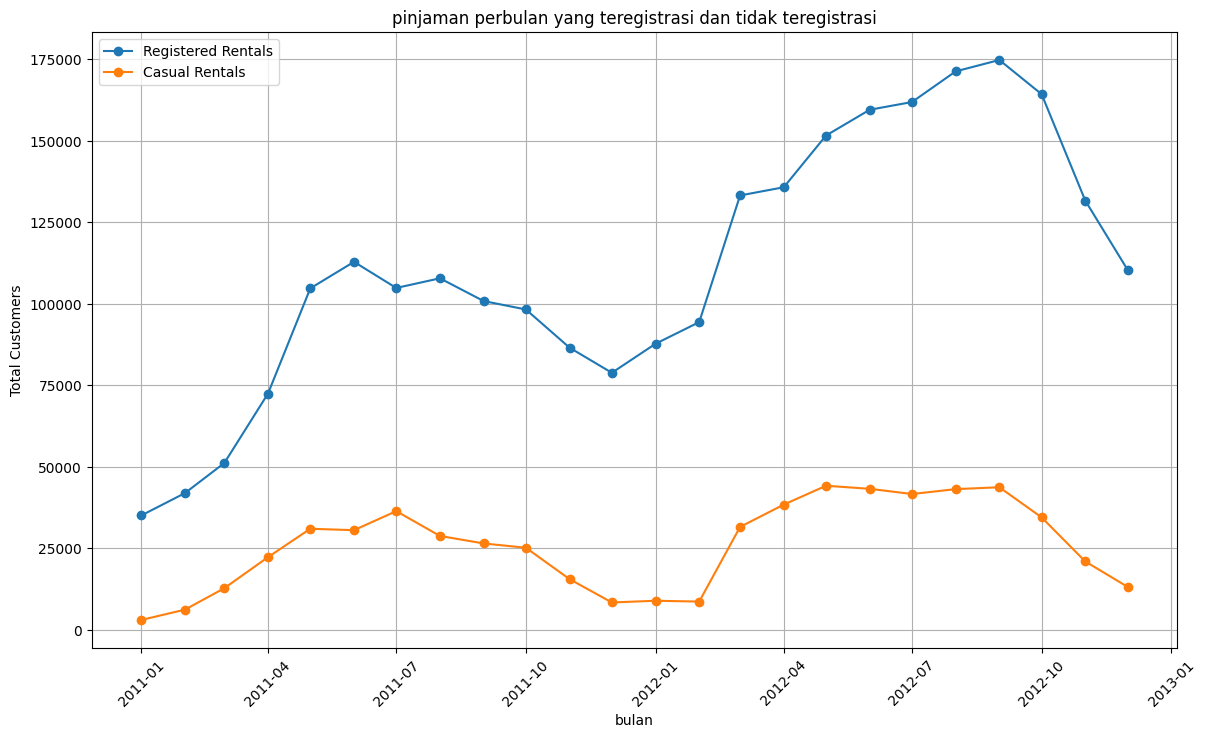

In [77]:
plt.figure(figsize=(14, 8))
plt.plot(pinjaman_perbulan1['date'], pinjaman_perbulan1['registered'], marker='o', label='Registered Rentals')
plt.plot(pinjaman_perbulan1['date'], pinjaman_perbulan1['casual'], marker='o', label='Casual Rentals')

plt.title('pinjaman perbulan yang teregistrasi dan tidak teregistrasi')
plt.xlabel('bulan')
plt.ylabel('Total Customers')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

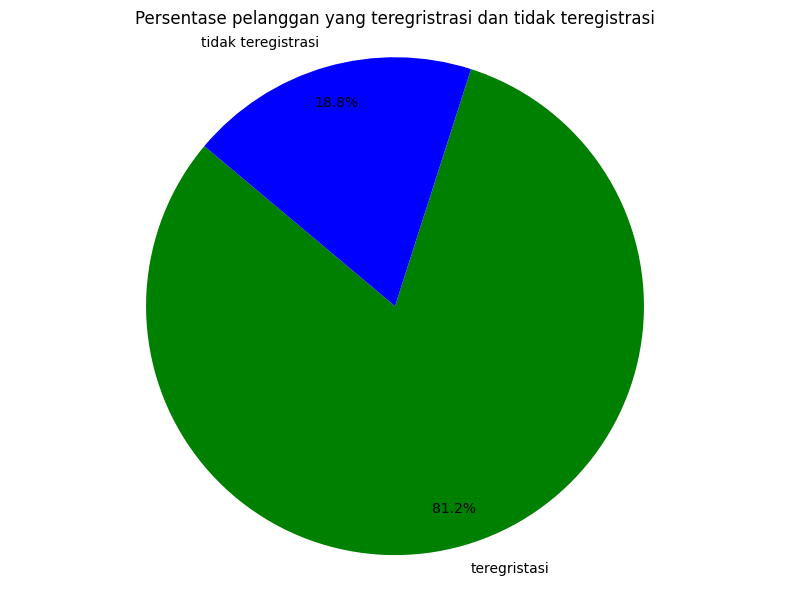

In [78]:
total_registered = data_utama1['registered'].sum()
total_casual = data_utama1['casual'].sum()
labels = ['teregristasi', 'tidak teregistrasi']
sizes = [total_registered, total_casual]
colors = ['green', 'blue']

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
plt.axis('equal')
plt.title('Persentase pelanggan yang teregristrasi dan tidak teregistrasi')
plt.tight_layout()
plt.show()

dari hasil visualisasi grafik dan diagram pie kita dapat mengetahui bahwa lebih banyak peminjam sepeda yang teregistrasi/terdaftar sebesar 81.2% dari pada yang tidak teregristrasi sebesar 18.8%

### Pertanyaan 2:

bagaimana performa peminjaman sepeda pada tahun 2011 sampai tahun 2012

In [79]:
data_utama1 = df_hour.copy()
mapping_tahun = {0: '2011', 1: '2012'}
mapping_bulan = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
mapping_musim = {1:'Spring', 2: 'Summer', 3:'Fall', 4:'Winter'}
mapping_cuaca = {1:'Clear', 2: 'Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'}


data_utama1['yr'] = data_utama1['yr'].map(mapping_tahun)
data_utama1['mnth'] = data_utama1['mnth'].map(mapping_bulan)
data_utama1['weekday'] = data_utama1['dteday'].dt.day_name()
data_utama1['season'] = data_utama1['season'].map(mapping_musim)
data_utama1['weathersit'] = data_utama1['weathersit'].map(mapping_cuaca)
data_utama1 = data_utama1[['dteday', 'yr', 'mnth', 'hr', 'weekday', 'season', 'weathersit','cnt', 'registered', 'casual']]

print(data_utama1)

          dteday    yr      mnth  hr   weekday season weathersit  cnt  \
0     2011-01-01  2011   January   0  Saturday    NaN      Clear   16   
1     2011-01-01  2011   January   1  Saturday    NaN      Clear   40   
2     2011-01-01  2011   January   2  Saturday    NaN      Clear   32   
3     2011-01-01  2011   January   3  Saturday    NaN      Clear   13   
4     2011-01-01  2011   January   4  Saturday    NaN      Clear    1   
...          ...   ...       ...  ..       ...    ...        ...  ...   
17374 2012-12-31  2012  December  19    Monday    NaN     Cloudy  119   
17375 2012-12-31  2012  December  20    Monday    NaN     Cloudy   89   
17376 2012-12-31  2012  December  21    Monday    NaN      Clear   90   
17377 2012-12-31  2012  December  22    Monday    NaN      Clear   61   
17378 2012-12-31  2012  December  23    Monday    NaN      Clear   49   

       registered  casual  
0              13       3  
1              32       8  
2              27       5  
3          

In [80]:
pinjaman_perbulan2 = data_utama1.groupby(['yr', 'mnth'])[['cnt', 'registered', 'casual']].sum().reset_index()
pinjaman_perbulan2 = pinjaman_perbulan2[['yr', 'mnth', 'cnt', 'registered', 'casual']]
print(pinjaman_perbulan2)

      yr       mnth     cnt  registered  casual
0   2011      April   94870       72524   22346
1   2011     August  136691      107849   28842
2   2011   December   87323       78875    8448
3   2011   February   48215       41973    6242
4   2011    January   38189       35116    3073
5   2011       July  141341      104889   36452
6   2011       June  143512      112900   30612
7   2011      March   64045       51219   12826
8   2011        May  135821      104771   31050
9   2011   November  102167       86573   15594
10  2011    October  123511       98289   25222
11  2011  September  127418      100873   26545
12  2012      April  174224      135768   38456
13  2012     August  214503      171306   43197
14  2012   December  123713      110468   13245
15  2012   February  103137       94416    8721
16  2012    January   96744       87775    8969
17  2012       July  203607      161902   41705
18  2012       June  202830      159536   43294
19  2012      March  164875      133257 

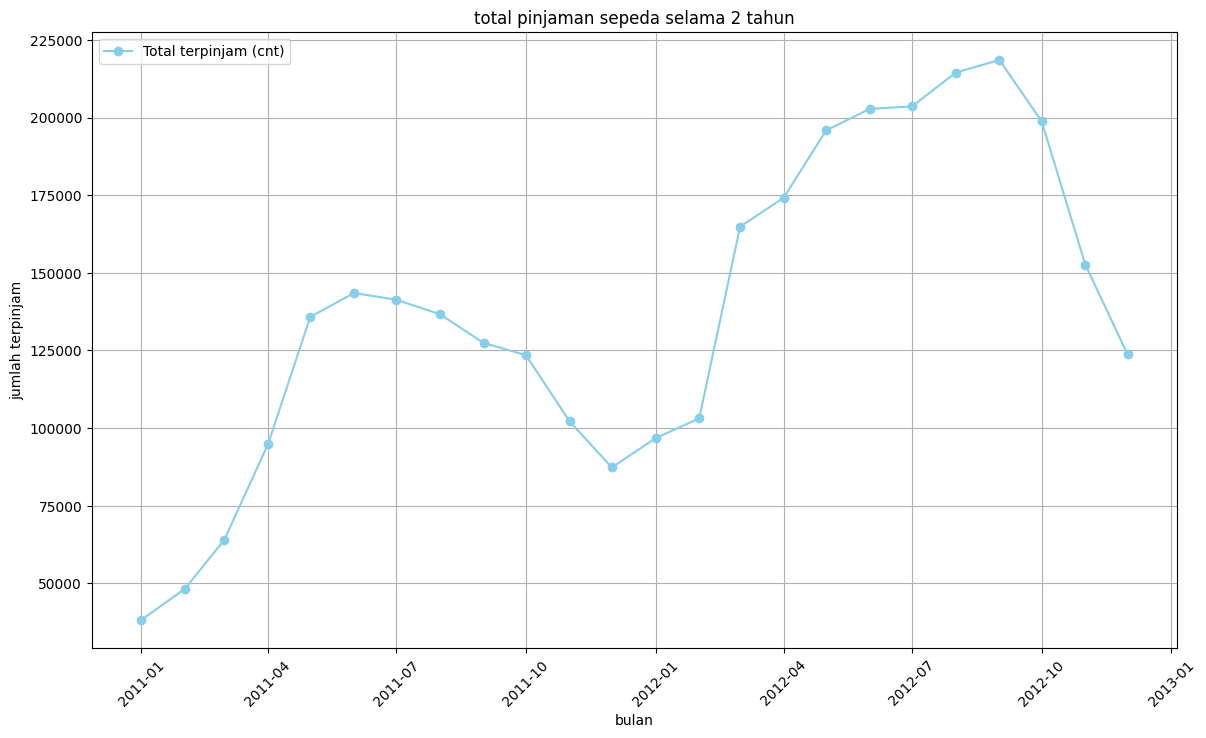

In [81]:
pinjaman_perbulan2['date'] = pinjaman_perbulan2['yr'] + '-' + pinjaman_perbulan2['mnth']
pinjaman_perbulan2['date'] = pd.to_datetime(pinjaman_perbulan2['date'], format='%Y-%B')
pinjaman_perbulan2 = pinjaman_perbulan2.sort_values('date')

plt.figure(figsize=(14, 8))
plt.plot(pinjaman_perbulan2['date'], pinjaman_perbulan2['cnt'], marker='o', label='Total terpinjam (cnt)', color='skyblue')
plt.title('total pinjaman sepeda selama 2 tahun')
plt.xlabel('bulan')
plt.ylabel('jumlah terpinjam')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

TAHUN 2011

kuartal pertama mengalami kenaikan drastis dan signifikan

kuartal ke-dua mengalami kenaikan

kuartal ke-tiga mengalami penurunan

kuartal ke-empat mengalami penurunan yang signifikan

TAHUN 2012

kuartal pertama mengalami kenaikan

kuartal ke-dua mengalami kenaikan

kuartal ke-tiga mengalami kenaikan dan penurunan(stagnan)

kuartal ke-empat mengalami penurunan yang drastis



**secara grafik total pinjaman sepeda selama 2 tahun memiliki peningkatan  **


### ANALISIS LANJUTAN

CLUSTERING

In [82]:
import sklearn
from sklearn.cluster import KMeans

In [83]:
df_hour = df_hour[['hr','cnt']]
df_hour.head()

,hr,cnt
0,0,16
1,1,40
2,2,32
3,3,13
4,4,1


In [84]:
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(df_hour)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

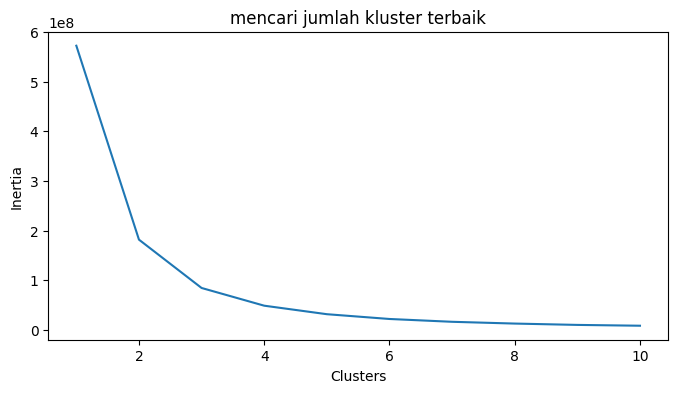

In [85]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('mencari jumlah kluster terbaik')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


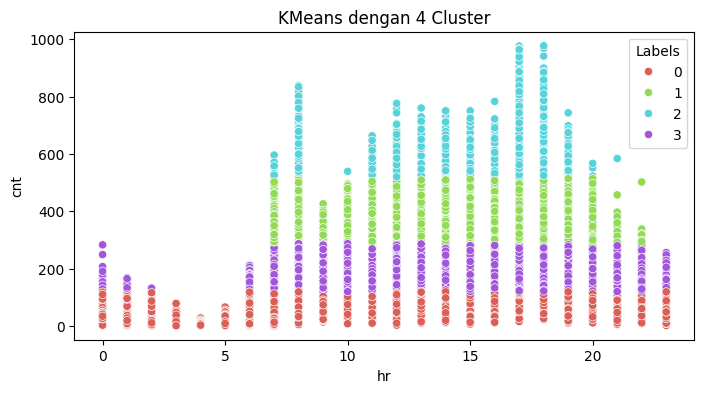

In [86]:
km4 = KMeans(n_clusters=4).fit(df_hour)

df_hour['Labels'] = km4.labels_

plt.figure(figsize=(8,4))
sns.scatterplot(data=df_hour, x='hr', y='cnt', hue='Labels',
                palette=sns.color_palette('hls', 4))
plt.title('KMeans dengan 4 Cluster')
plt.show()

In [87]:
cluster_means = df_hour.groupby('Labels')['cnt'].mean()

print(cluster_means)

Labels
0     43.174719
1    382.632907
2    649.272414
3    196.300756
Name: cnt, dtype: float64


## Conclusion

berdasarkan proses analisis data BIKE SHARING DATASETS dan rumusan permasalahan bisnis yang ada maka dapat disimpulkan sebagai berikut


- Conclution pertanyaan 1

  jumlah peminjam sepada yang teregistrasi/terdaftar lebih banyak dari yang tidak teregistrasi hal ini menandakan bahwa pemsaran bisnis perlu di optimalkan kepada pelanggan yang baru agar dapat meningkatkan jumlah peminjam.

- Conclution pertanyaan 2

  dari hasil visualisasi grafik,peforma peminjaman sepeda dari tahun 2011 sampai 2012 mengalami peningkatan yang cukup baik,dimana peningkatan drastis berada pada tahun 2012 di antara kuartal dua dan tiga

In [88]:
data_utama1.to_csv('data_utama1.csv')